In [2]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal
import matplotlib as mpl
import numpy
import pyupset as pyu
# mpl.rcParams['font.sans-serif']='Arial'
# mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [3]:
special_flowers = ['MMETSP0693', 'MMETSP1019', 'MMETSP0923', 'MMETSP0008', 'MMETSP1002', 'MMETSP1325', 'MMETSP1018', 
                   'MMETSP1346', 'MMETSP0088', 'MMETSP0092', 'MMETSP0717', 'MMETSP0223', 'MMETSP0115', 'MMETSP0196', 
                   'MMETSP0197', 'MMETSP0398', 'MMETSP0399', 'MMETSP0922']

In [4]:
# transrate score metrics
#file_ncgr_transrate_scores = "../assembly_evaluation_data/transrate_scores_imicrobe_cds.csv"
#file_dib_transrate_scores = "../assembly_evaluation_data/transrate_scores_trinity-2.2.0.csv"
#ncgr_transrate_score = pd.read_csv(file_ncgr_transrate_scores, index_col='SampleName')
#dib_transrate_score = pd.read_csv(file_dib_transrate_scores, index_col='SampleName')
#transrate reference metrics
#file_ncgr_transrate_nt = "../assembly_evaluation_data/transrate_reverse_ncgr.nt_v_trinity2.2.0.csv"
#file_dib_transrate_nt = "../assembly_evaluation_data/transrate_reference_trinity2.2.0_v_ncgr.nt.csv"
#ncgr_transrate_nt = pd.read_csv(file_ncgr_transrate_nt, index_col='SampleName')
#dib_transrate_nt = pd.read_csv(file_dib_transrate_nt, index_col='SampleName')
# dammit gene names comparison
unique_names = pd.read_csv("../assembly_evaluation_data/unique_gene_names_ncgr_dib.csv")

In [12]:
giant_matrix = "../assembly_evaluation_data/MMETSP_all_evaluation_matrix.csv"
all_metrics = pd.read_csv(giant_matrix)
#all_metrics.columns.values
# transrate score metrics
all_metrics = all_metrics[~all_metrics['SampleName'].isin(special_flowers)]
ncgr_cds_transrate_score = all_metrics[['SampleName', 'score.y','mean_orf_percent.y']]
ncgr_nt_transrate_score = all_metrics[['SampleName','score.x']]
dib_transrate_score = all_metrics[['SampleName','score']]
ncgr_nt_transrate_score.columns = ['SampleName','score']
ncgr_cds_transrate_score.columns = ['SampleName','score','mean_orf_percent']
#transrate reference metrics
ncgr_transrate_nt = all_metrics[['SampleName','p_refs_with_CRBB.y','n_seqs.x','mean_orf_percent.x']]
dib_transrate_nt = all_metrics[['SampleName','p_refs_with_CRBB','n_seqs','mean_orf_percent']]
ncgr_transrate_nt.columns = ['SampleName','p_refs_with_CRBB','n_seqs','mean_orf_percent']
#ncgr_transrate_nt.shape

In [11]:
a = list(all_metrics.columns.values)
print(a)

['Unnamed: 0', 'SampleName', 'Run.x', 'ReleaseDate', 'LoadDate', 'spots', 'bases', 'spots_with_mates', 'avgLength', 'size_MB', 'download_path', 'Experiment', 'LibraryStrategy', 'LibrarySelection', 'LibrarySource', 'LibraryLayout', 'Platform', 'Model', 'SRAStudy', 'BioProject', 'ProjectID', 'Sample', 'BioSample', 'SampleType', 'TaxID', 'ScientificName', 'CenterName', 'Submission', 'Consent', 'RunHash', 'ReadHash', 'Investigator', 'HighLevelClassification', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'Strain', 'Input.Reads', 'Surviving.Reads', 'Percent.Surviving', 'assembly', 'n_seqs', 'smallest.x', 'largest.x', 'n_bases.x', 'mean_len.x', 'n_under_200.x', 'n_over_1k.x', 'n_over_10k.x', 'n_with_orf.x', 'mean_orf_percent', 'n90.x', 'n70.x', 'n50.x', 'n30.x', 'n10.x', 'gc.x', 'gc_skew.x', 'at_skew.x', 'cpg_ratio.x', 'bases_n.x', 'proportion_n.x', 'linguistic_complexity.x', 'fragments.x', 'fragments_mapped.x', 'p_fragments_mapped.x', 'good_mappings.x', 'p_good_mapping.x', 'bad_

In [135]:
all_metrics.shape

(660, 289)

In [136]:
dib_transrate_nt.shape

(660, 4)

In [137]:
#dib_transrate_nt = dib_transrate_nt.drop_duplicates()
#ncgr_transrate_nt = ncgr_transrate_nt.drop_duplicates()
dib_transrate_nt = dib_transrate_nt.dropna()
ncgr_transrate_nt = ncgr_transrate_nt.dropna()

In [138]:
ncgr_transrate_nt.shape

(639, 4)

In [139]:
dib_transrate_nt.shape

(644, 4)

In [140]:
ncgr_cds_transrate_score.shape

(660, 2)

In [141]:
ncgr_nt_transrate_score.shape

(660, 2)

In [142]:
dib_transrate_score.shape

(660, 2)

In [143]:
#ncgr_cds_transrate_score = ncgr_cds_transrate_score.drop_duplicates()
#ncgr_nt_transrate_score = ncgr_nt_transrate_score.drop_duplicates()
#dib_transrate_score = dib_transrate_score.drop_duplicates()
ncgr_cds_transrate_score = ncgr_cds_transrate_score.dropna()
ncgr_nt_transrate_score = ncgr_nt_transrate_score.dropna()
dib_transrate_score = dib_transrate_score.dropna()

In [144]:
ncgr_cds_transrate_score.shape

(630, 2)

In [145]:
ncgr_nt_transrate_score.shape

(639, 2)

In [146]:
dib_transrate_score.shape

(653, 2)

In [147]:
# dammit gene names comparison
gene_names = unique_names.drop_duplicates()
# giant matrix of all metrics, including phyla
#all_metrics = all_metrics.drop_duplicates()

In [148]:
#checking the comparison of the two sets. 
ddd=set(dib_transrate_nt.index) #special flowers are missing
ncnc=set(ncgr_transrate_nt.index)
len(ddd.intersection(ncnc))

638

In [316]:
def scatter_diff(df1, df2, column, fig, ax, df1name = 'df1', df2name = 'df2', 
                 color1='#8B4513', color2='blue', ymin=0, ymax=1, ypos=.95):
    # plot scatter differences between two dfs with the same columns
    # create new df for data comparison
    
    combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
    newdf=pd.DataFrame(index=combined_df.index)
    newdf[df1name]=combined_df[column+'_x']
    newdf[df2name]=combined_df[column+'_y']

    # plot with different colors if df1 > or < then df2
    
    newdf.loc[newdf[df1name] > newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                          color = color1, alpha = 0.5, lw=2)
    newdf.loc[newdf[df1name] <= newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                           color = color2, alpha = 0.2, lw=2)
    # prints numbers higher in DIB or NCGR assemblies
    #ax.text(-.1, ypos, str(len(newdf.loc[newdf[df1name] > newdf[df2name]])), 
            #color= color1, fontsize='x-large', fontweight='heavy')
    #ax.text(.95, ypos, str(len(newdf.loc[newdf[df1name] <= newdf[df2name]])), 
            #color= color2, fontsize='x-large', fontweight='heavy')

    # aesthetics 
    ax.set_xlim(-.15, 1.3)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([0,1])
    plt.ylabel('Proportion of reference with a CRBB hit')
    ax.set_xticklabels([df1name, df2name], fontsize='large', fontweight='bold', fontname='Arial')
    ax.set_axis_bgcolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelsize='x-large')
    ax.tick_params(axis='x', which='both', top='off', bottom='off')
    ax.tick_params(axis='y', which='both', right='off')
    for tick in ax.get_yticklabels():
        tick.set_fontname("Arial")
    ax.text(0.2, 1.07, 'A',
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=32, fontweight = 'bold')
    return newdf, fig, ax
    

def violin_split(df, col1, col2, fig, ax, color2='#8B4513', color1='blue', ymin=0, ymax=1, letter2='B'):
    #create split violine plots
    v1 = ax.violinplot(df[col1],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color(color2)
        b.set_alpha(0.5)
    v2 = ax.violinplot(df[col2],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v2['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_color(color1)
        b.set_alpha(0.5)
    
    [x1,x2]=ax.get_xlim()
    #plot NCGR mean
    ax.plot([0,1], [df[col1].mean()]*2,'--', color='black')
    #plot DIB mean
    ax.plot([1,2], [df[col2].mean()]*2, '--', color='black')
    calc_value_ncgr = round(df[col1].mean(),2)
    calc_value_dib = round(df[col2].mean(),2)
    if calc_value_ncgr >= 1000:
        calc_value_ncgr = str(int(calc_value_ncgr/1000)) + "K"
    if calc_value_dib >= 1000:
        calc_value_dib = str(int(calc_value_dib/1000)) + "K"
    calc_value_ncgr = str(calc_value_ncgr)
    calc_value_dib = str(calc_value_dib)
    ax.text(0.5+x1/2, df[col1].mean(), calc_value_ncgr, fontsize='x-large', fontweight='bold',
            multialignment='center', fontname='Arial')
    ax.text(0.5+x2/2, df[col2].mean(), calc_value_dib, fontsize='x-large', fontweight='bold',
            multialignment='center', fontname='Arial')

    ax.set_xlim(x1,x2)
    ax.set_xticks([])
    #ax.set_xticklabels(['NCGR', 'DIB'], fontsize='large', fontweight='bold', fontname='Arial')
    ax.set_ylim([ymin, ymax])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis= 'both',labelsize='x-large')
    #ax.set_axis_bgcolor('white')
    ax.set_yticklabels('')
    ax.tick_params(axis='x', which='both', top='off', bottom='off')
    #ax.tick_params(axis='x', which='both', top='off')
    ax.tick_params(axis='y', which='both', right='off')
    ax.text(0.2, 1.07, 'B',
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=32, fontweight = 'bold')

def create_plots(df1, df2, column, col_title, df1name = 'NCGR', df2name = 'DIB', ymax = 1, ymin = 0, ypos = 0.90):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(6,6)
    outdf, fig, ax = scatter_diff(df1, df2, column = column, 
                 fig = fig, ax = axs[0],df1name = df1name, df2name = df2name, 
                                  ymax = ymax, ymin = ymin, ypos = ypos)
    violin_split(outdf, df1name, df2name, fig, axs[1], ymin = ymin, ymax = ymax)
    fig.suptitle(col_title, fontsize = 'x-large', fontweight = 'bold', fontname='Arial')
    
    return outdf, fig, ax

# Figure 2

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


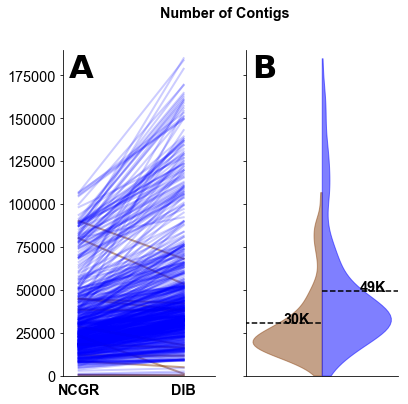

In [242]:
p_refs,fig, ax = create_plots(ncgr_transrate_nt,dib_transrate_nt, 'n_seqs', 'Number of Contigs',ymax=190000, ypos=55000)
fig.savefig('../paper/n_contigs.pdf',bbox_inches="tight")
fig.savefig('../paper/n_contigs.png',bbox_inches="tight")

# Figure 3

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


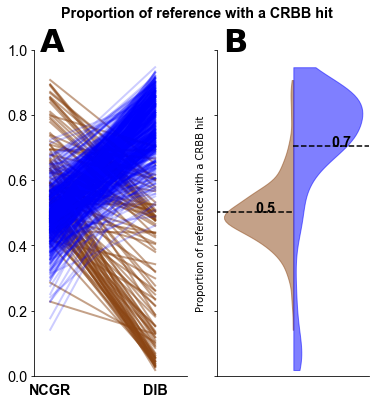

In [317]:
p_refs,fig, ax = create_plots(ncgr_transrate_nt,dib_transrate_nt, 'p_refs_with_CRBB', 'Proportion of reference with a CRBB hit',ymax=1, ypos=1)

fig.savefig('../paper/CRB-blast.pdf',bbox_inches="tight")
fig.savefig('../paper/CRB-blast.png',bbox_inches="tight")

In [152]:
ncgr_cds_transrate_score.head()

,SampleName,score
0,MMETSP0004,0.22481
1,MMETSP0005,0.22807
2,MMETSP0006,0.19486
3,MMETSP0007,0.08813
6,MMETSP0009,0.19473


/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


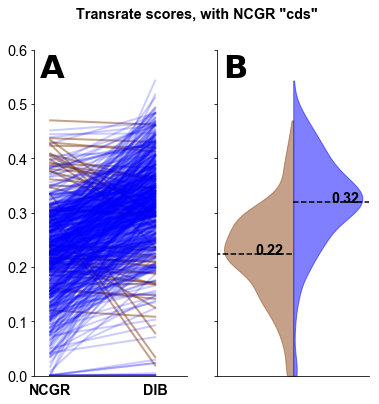

In [244]:
score,fig, ax = create_plots(ncgr_cds_transrate_score,dib_transrate_score, 'score', 'Transrate scores, with NCGR "cds"',ymax=.6, ypos=0.55)
savefig('../paper/transrate_cds.png',bbox_inches="tight")
savefig('../paper/transrate_cds.pdf',bbox_inches="tight")

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


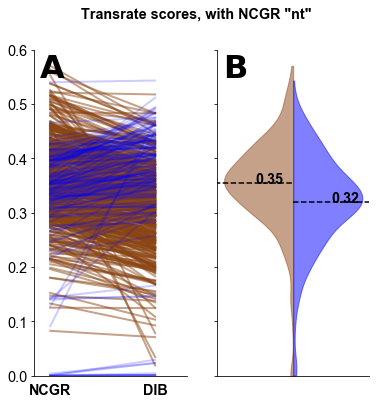

In [245]:
score,fig, ax = create_plots(ncgr_nt_transrate_score,dib_transrate_score, 'score', 'Transrate scores, with NCGR "nt"',ymax=.6, ypos=0.55)
savefig('../paper/transrate_nt.png',bbox_inches="tight")
savefig('../paper/transrate_nt.pdf',bbox_inches="tight")

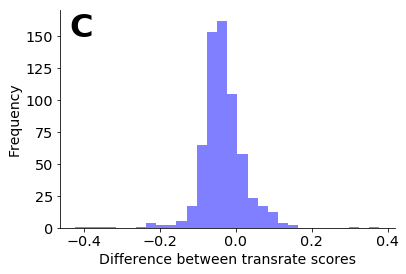

In [251]:
from matplotlib.patches import Ellipse, Polygon
ncgr_tmp = ncgr_nt_transrate_score.set_index("SampleName")
dib_tmp = dib_transrate_score.set_index("SampleName")
diff_tmp = dib_tmp - ncgr_tmp
ax = diff_tmp.plot(kind='hist', bins=30,legend=False,color='blue',alpha = 0.5)
ax.set_xlabel("Difference between transrate scores",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis= 'both',labelsize='x-large')
ax.tick_params(axis='x', which='both', top='off')
#ax.tick_params(axis='y', which='both', right='off')
ax.text(0.03, 0.99, 'C',
    verticalalignment='top', horizontalalignment='left',
    transform=ax.transAxes,
    color='black', fontsize=32, fontweight = 'bold')
savefig('../paper/hist_transrate_diff.pdf',bbox_inches="tight")
savefig('../paper/hist_transrate_diff.png',bbox_inches="tight")

# Figure 5

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


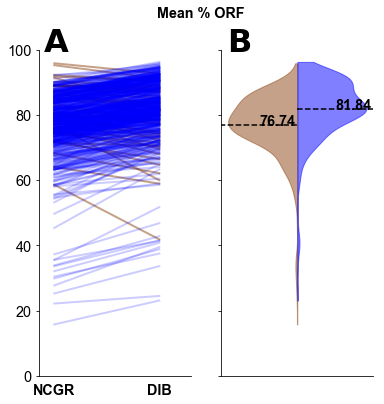

In [275]:
p_refs,fig, ax = create_plots(ncgr_transrate_nt,dib_transrate_nt, 'mean_orf_percent', 'Mean % ORF',ymax=100, ypos=100)
savefig('../paper/mean_ORF.pdf',bbox_inches="tight")
savefig('../paper/mean_ORF.png',bbox_inches="tight")

In [261]:
imicrobe_busco = all_metrics[['SampleName','NCGR.Complete_eukaryotic_BUSCO_perc']]
imicrobe_busco.columns = ['SampleName','Complete_eukaryotic_BUSCO_perc']
imicrobe_busco = imicrobe_busco.dropna()

In [262]:
dib_busco = all_metrics[['SampleName','DIB.Complete_eukaryotic_BUSCO_perc']]
dib_busco.columns = ['SampleName','Complete_eukaryotic_BUSCO_perc']
dib_busco = dib_busco.dropna()

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


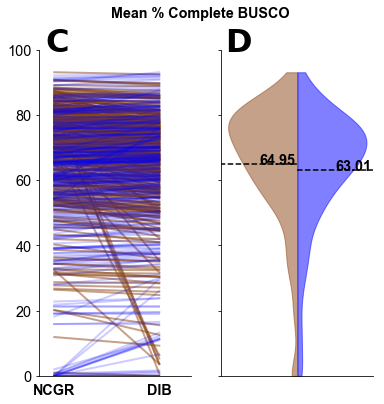

In [266]:
p_refs,fig, ax = create_plots(imicrobe_busco,dib_busco, 'Complete_eukaryotic_BUSCO_perc', 'Mean % Complete BUSCO',ymax=100, ypos=100)
savefig('../paper/mean_BUSCO.png',bbox_inches="tight")
savefig('../paper/mean_BUSCO.pdf',bbox_inches="tight")

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


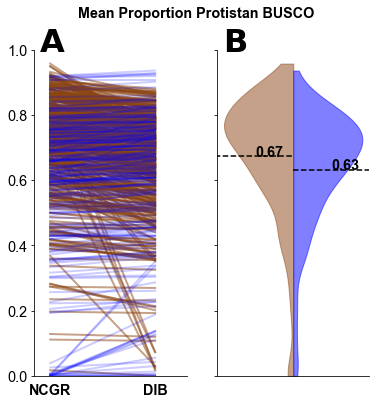

In [276]:
dib_busco = all_metrics[['SampleName','DIB.Complete_protist_BUSCO_prop']]
dib_busco.columns = ['SampleName','Complete_protist_BUSCO_prop']
dib_busco = dib_busco.dropna()
imicrobe_busco = all_metrics[['SampleName','NCGR.Complete_protist_BUSCO_prop']]
imicrobe_busco.columns = ['SampleName','Complete_protist_BUSCO_prop']
imicrobe_busco = imicrobe_busco.dropna()

p_refs,fig, ax = create_plots(imicrobe_busco,dib_busco, 'Complete_protist_BUSCO_prop', 'Mean Proportion Protistan BUSCO',ymax=1.0, ypos=1.0)

savefig('../paper/mean_protist_BUSCO.png',bbox_inches="tight")
savefig('../paper/mean_protist_BUSCO.pdf',bbox_inches="tight")

# BUSCO v3

In [27]:
dib_busco_v3_euk = pd.read_csv("../assembly_evaluation_data/busco_scores_v3_dib_eukaryota.csv")
dib_busco_v3_protist = pd.read_csv("../assembly_evaluation_data/busco_scores_v3_dib_protist.csv")
ncgr_busco_v3_euk = pd.read_csv("../assembly_evaluation_data/busco_scores_v3_imicrobe_eukaryota.csv")
ncgr_busco_v3_protist = pd.read_csv("../assembly_evaluation_data/busco_scores_v3_imicrobe_protist.csv")

In [293]:
dib_busco_v3_protist.head()

,Unnamed: 0,Complete,Fragmented,Missing,Total,Complete_BUSCO_perc
0,MMETSP0052,86,5,124,215,0.400000
1,MMETSP1370,95,4,116,215,0.441860
2,MMETSP0941,118,4,93,215,0.548837
3,MMETSP0574,116,2,97,215,0.539535
4,MMETSP0167,56,2,157,215,0.260465


In [28]:
dib_busco_v3_euk.columns = [['SampleName','Complete','Fragmented','Missing','Total','Complete_BUSCO_perc']]
dib_busco_v3_euk = dib_busco_v3_euk[['SampleName','Complete_BUSCO_perc']]
dib_busco_v3_euk['Complete_BUSCO_perc'] = dib_busco_v3_euk.loc[:,'Complete_BUSCO_perc'] * 100
dib_busco_v3_protist.columns = [['SampleName','Complete','Fragmented','Missing','Total','Complete_BUSCO_perc']]
dib_busco_v3_protist = dib_busco_v3_protist[['SampleName','Complete_BUSCO_perc']]
ncgr_busco_v3_euk.columns = [['SampleName','Complete','Fragmented','Missing','Total','Complete_BUSCO_perc']]
ncgr_busco_v3_euk = ncgr_busco_v3_euk[['SampleName','Complete_BUSCO_perc']]
ncgr_busco_v3_euk['Complete_BUSCO_perc'] = ncgr_busco_v3_euk.loc[:,'Complete_BUSCO_perc'] * 100
ncgr_busco_v3_protist.columns = [['SampleName','Complete','Fragmented','Missing','Total','Complete_BUSCO_perc']]
ncgr_busco_v3_protist = ncgr_busco_v3_protist[['SampleName','Complete_BUSCO_perc']]

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


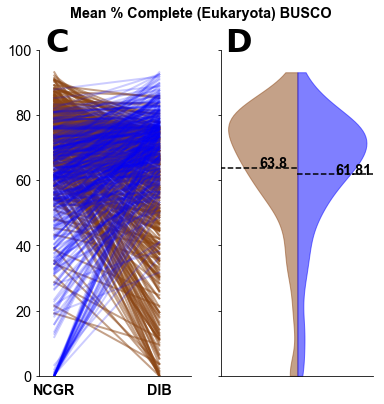

In [305]:
p_refs,fig, ax = create_plots(ncgr_busco_v3_euk,dib_busco_v3_euk,'Complete_BUSCO_perc', 'Mean % Complete (Eukaryota) BUSCO',ymax=100, ypos=100)
savefig('../paper/mean_euk_BUSCO.png',bbox_inches="tight")
savefig('../paper/mean_euk_BUSCO.pdf',bbox_inches="tight")

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


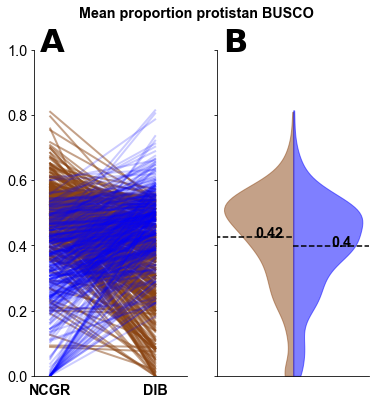

In [278]:
p_refs,fig, ax = create_plots(ncgr_busco_v3_protist,dib_busco_v3_protist,'Complete_BUSCO_perc', 'Mean proportion protistan BUSCO',ymax=1.0, ypos=1.0)

In [166]:
ncgr_busco_v3_protist.shape

(675, 2)

# Table 1

In [167]:
# busco version 3
#file_busco_dib_v3 = "../assembly_evaluation_data/transrate_reverse_ncgr.nt_v_trinity2.2.0.csv"
#file_busco_ncgr_v3 = "../assembly_evaluation_data/transrate_reference_trinity2.2.0_v_ncgr.nt.csv"
#ncgr_transrate_nt = pd.read_csv(file_ncgr_transrate_nt, index_col='SampleName')
#dib_transrate_nt = pd.read_csv(file_dib_transrate_nt, index_col='SampleName')

In [86]:
df1=ncgr_transrate_nt
df2=dib_transrate_nt
column='p_refs_with_CRBB'
df1name = 'df1'
df2name = 'df2'
combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
newdf=pd.DataFrame(index=combined_df.index)
newdf[df1name]=combined_df[column+'_x']
newdf[df2name]=combined_df[column+'_y']
print('NCGR:',len(newdf.loc[newdf[df1name] > newdf[df2name]]))
print('DIB:',len(newdf.loc[newdf[df1name] <= newdf[df2name]]))
print(combined_df.head())

NCGR: 107
DIB: 544
  SampleName_x  p_refs_with_CRBB_x  n_seqs_x  mean_orf_percent_x SampleName_y  \
0   MMETSP0004             0.45255   24327.0            72.04233   MMETSP0004   
1   MMETSP0005             0.47173   25033.0            72.09239   MMETSP0005   
2   MMETSP0006             0.45844   30986.0            73.27725   MMETSP0006   
3   MMETSP0007             0.59737   21267.0            66.31098   MMETSP0007   
6   MMETSP0009             0.45785   30594.0            74.44895   MMETSP0009   

   p_refs_with_CRBB_y  n_seqs_y  mean_orf_percent_y  
0             0.66202   33559.0            81.26381  
1             0.65470   32824.0            80.15649  
2             0.72184   47463.0            80.79508  
3             0.86524   30922.0            71.01950  
6             0.79764   54275.0            80.37076  


In [80]:
df1=ncgr_transrate_nt
df2=dib_transrate_nt
column='n_seqs'
df1name = 'df1'
df2name = 'df2'
combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
newdf=pd.DataFrame(index=combined_df.index)
newdf[df1name]=combined_df[column+'_x']
newdf[df2name]=combined_df[column+'_y']
print('NCGR:',len(newdf.loc[newdf[df1name] > newdf[df2name]]))
print('DIB:',len(newdf.loc[newdf[df1name] <= newdf[df2name]]))
print(combined_df.head())

NCGR: 12
DIB: 626
  SampleName_x  p_refs_with_CRBB_x  n_seqs_x  mean_orf_percent_x SampleName_y  \
0   MMETSP0004             0.45255   24327.0            72.04233   MMETSP0004   
1   MMETSP0005             0.47173   25033.0            72.09239   MMETSP0005   
2   MMETSP0006             0.45844   30986.0            73.27725   MMETSP0006   
3   MMETSP0007             0.59737   21267.0            66.31098   MMETSP0007   
6   MMETSP0009             0.45785   30594.0            74.44895   MMETSP0009   

   p_refs_with_CRBB_y  n_seqs_y  mean_orf_percent_y  
0             0.66202   33559.0            81.26381  
1             0.65470   32824.0            80.15649  
2             0.72184   47463.0            80.79508  
3             0.86524   30922.0            71.01950  
6             0.79764   54275.0            80.37076  


In [85]:
df1=ncgr_transrate_nt
df2=dib_transrate_nt
column='mean_orf_percent'
df1name = 'df1'
df2name = 'df2'
combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
newdf=pd.DataFrame(index=combined_df.index)
newdf[df1name]=combined_df[column+'_x']
newdf[df2name]=combined_df[column+'_y']
print('NCGR:',len(newdf.loc[newdf[df1name] > newdf[df2name]]))
print('DIB:',len(newdf.loc[newdf[df1name] <= newdf[df2name]]))
print(combined_df.head())

NCGR: 42
DIB: 596
  SampleName_x  p_refs_with_CRBB_x  n_seqs_x  mean_orf_percent_x SampleName_y  \
0   MMETSP0004             0.45255   24327.0            72.04233   MMETSP0004   
1   MMETSP0005             0.47173   25033.0            72.09239   MMETSP0005   
2   MMETSP0006             0.45844   30986.0            73.27725   MMETSP0006   
3   MMETSP0007             0.59737   21267.0            66.31098   MMETSP0007   
6   MMETSP0009             0.45785   30594.0            74.44895   MMETSP0009   

   p_refs_with_CRBB_y  n_seqs_y  mean_orf_percent_y  
0             0.66202   33559.0            81.26381  
1             0.65470   32824.0            80.15649  
2             0.72184   47463.0            80.79508  
3             0.86524   30922.0            71.01950  
6             0.79764   54275.0            80.37076  


In [79]:
df1=ncgr_cds_transrate_score
df2=dib_transrate_nt
column='mean_orf_percent'
df1name = 'df1'
df2name = 'df2'
combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
newdf=pd.DataFrame(index=combined_df.index)
newdf[df1name]=combined_df[column+'_x']
newdf[df2name]=combined_df[column+'_y']
print('NCGR:',len(newdf.loc[newdf[df1name] > newdf[df2name]]))
print('DIB:',len(newdf.loc[newdf[df1name] <= newdf[df2name]]))
print(combined_df.head())

NCGR: 592
DIB: 35
  SampleName_x    score  mean_orf_percent_x SampleName_y  p_refs_with_CRBB  \
0   MMETSP0004  0.22481            92.61431   MMETSP0004           0.66202   
1   MMETSP0005  0.22807            93.43060   MMETSP0005           0.65470   
2   MMETSP0006  0.19486            92.79472   MMETSP0006           0.72184   
3   MMETSP0007  0.08813            96.21292   MMETSP0007           0.86524   
6   MMETSP0009  0.19473            95.14633   MMETSP0009           0.79764   

    n_seqs  mean_orf_percent_y  
0  33559.0            81.26381  
1  32824.0            80.15649  
2  47463.0            80.79508  
3  30922.0            71.01950  
6  54275.0            80.37076  


In [21]:
combined_df.head()

,SampleName_x,score,mean_orf_percent_x,SampleName_y,p_refs_with_CRBB,n_seqs,mean_orf_percent_y
0,MMETSP0004,0.22481,92.61431,MMETSP0004,0.66202,33559.0,81.26381
1,MMETSP0005,0.22807,93.43060,MMETSP0005,0.65470,32824.0,80.15649
2,MMETSP0006,0.19486,92.79472,MMETSP0006,0.72184,47463.0,80.79508
3,MMETSP0007,0.08813,96.21292,MMETSP0007,0.86524,30922.0,71.01950
6,MMETSP0009,0.19473,95.14633,MMETSP0009,0.79764,54275.0,80.37076


In [138]:
df1=ncgr_cds_transrate_score
df2=dib_transrate_score
column='score'
df1name = 'df1'
df2name = 'df2'
combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
newdf=pd.DataFrame(index=combined_df.index)
newdf[df1name]=combined_df[column+'_x']
newdf[df2name]=combined_df[column+'_y']
print('NCGR:',len(newdf.loc[newdf[df1name] > newdf[df2name]]))
print('DIB:',len(newdf.loc[newdf[df1name] <= newdf[df2name]]))

NCGR: 44
DIB: 583


In [112]:
df1=ncgr_nt_transrate_score
df2=dib_transrate_score
column='score'
df1name = 'df1'
df2name = 'df2'
combined_df = pd.merge(df1, df2, left_index=True, right_index=True,how='outer')
newdf=pd.DataFrame(index=combined_df.index)
newdf[df1name]=combined_df[column+'_x']
newdf[df2name]=combined_df[column+'_y']
print('NCGR:',len(newdf.loc[newdf[df1name] > newdf[df2name]]))
print('DIB:',len(newdf.loc[newdf[df1name] <= newdf[df2name]]))
print(combined_df.head())

NCGR: 495
DIB: 143
  SampleName_x  score_x SampleName_y  score_y
0   MMETSP0004  0.39877   MMETSP0004  0.38093
1   MMETSP0005  0.40975   MMETSP0005  0.38214
2   MMETSP0006  0.42249   MMETSP0006  0.38143
3   MMETSP0007  0.39719   MMETSP0007  0.27164
6   MMETSP0009  0.32455   MMETSP0009  0.25534


In [145]:
df1=ncgr_busco_v3_euk
print(df1.shape)
print(df1.head())
df2=dib_busco_v3_euk
print(df2.shape)
print(df2.head())
column='Complete_BUSCO_perc'
df1name = 'df1'
df2name = 'df2'
df1.columns = ['SampleName', 'Complete_BUSCO_perc_x']
df2.columns = ['SampleName', 'Complete_BUSCO_perc_y']
combined_df = pd.merge(df1, df2,on='SampleName')
print(combined_df.head())
print(combined_df.shape)
print('NCGR:',len(combined_df.loc[combined_df['Complete_BUSCO_perc_x'] > combined_df['Complete_BUSCO_perc_y']]))
print('DIB:',len(combined_df.loc[combined_df['Complete_BUSCO_perc_x'] <= combined_df['Complete_BUSCO_perc_y']]))

(676, 2)
   SampleName  Complete_BUSCO_perc_x
0  MMETSP1403              87.128713
1  MMETSP0292              54.785479
2  MMETSP1316              65.016502
3  MMETSP1042              60.066007
4  MMETSP0228              65.346535
(678, 2)
   SampleName  Complete_BUSCO_perc_y
0  MMETSP0052              78.877888
1  MMETSP1370              56.435644
2  MMETSP0941              85.148515
3  MMETSP0574              74.257426
4  MMETSP0167              60.066007
   SampleName  Complete_BUSCO_perc_x  Complete_BUSCO_perc_y
0  MMETSP1403              87.128713              85.808581
1  MMETSP0292              54.785479              53.135314
2  MMETSP1316              65.016502              60.396040
3  MMETSP1042              60.066007              63.366337
4  MMETSP0228              65.346535              67.326733
(676, 3)
NCGR: 392
DIB: 284


In [146]:
df1=ncgr_busco_v3_protist
df2=dib_busco_v3_protist
print(df1.shape)
print(df1.head())
print(df2.shape)
print(df2.head())
column='Complete_BUSCO_perc'
df1name = 'df1'
df2name = 'df2'
df1.columns = ['SampleName', 'Complete_BUSCO_perc_x']
df2.columns = ['SampleName', 'Complete_BUSCO_perc_y']
combined_df = pd.merge(df1, df2,on='SampleName')
print(combined_df.head())
print(combined_df.shape)
print('NCGR:',len(combined_df.loc[combined_df['Complete_BUSCO_perc_x'] > combined_df['Complete_BUSCO_perc_y']]))
print('DIB:',len(combined_df.loc[combined_df['Complete_BUSCO_perc_x'] <= combined_df['Complete_BUSCO_perc_y']]))

(675, 2)
   SampleName Complete_BUSCO_perc
0  MMETSP1403            0.544186
1  MMETSP0292            0.427907
2  MMETSP1316            0.237209
3  MMETSP1042            0.390698
4  MMETSP0228            0.493023
(678, 2)
   SampleName Complete_BUSCO_perc
0  MMETSP0052            0.400000
1  MMETSP1370            0.441860
2  MMETSP0941            0.548837
3  MMETSP0574            0.539535
4  MMETSP0167            0.260465
   SampleName  Complete_BUSCO_perc_x  Complete_BUSCO_perc_y
0  MMETSP1403               0.544186               0.525581
1  MMETSP0292               0.427907               0.348837
2  MMETSP1316               0.237209               0.223256
3  MMETSP1042               0.390698               0.381395
4  MMETSP0228               0.493023               0.460465
(675, 3)
NCGR: 439
DIB: 236


# Figure 5

In [174]:
data_table = pd.read_csv("../assembly_evaluation_data/merged_annotation_stats.csv",index_col='SampleName')
false_crbb = pd.read_csv("../assembly_evaluation_data/false_crbb.csv",index_col=0)

In [175]:
false_crbb.head()

,false_crbb_num_transcripts
MMETSP1347,812
MMETSP0603,5341
MMETSP0469,101484
MMETSP1075,57113
MMETSP1369,46402


In [176]:
crbb_df = pd.merge(data_table[['total_annotated_w_false_crbb']],false_crbb[['false_crbb_num_transcripts']],
                   how='outer',left_index=True,right_index=True).dropna()

In [177]:
crbb_df['difference']=crbb_df.false_crbb_num_transcripts-crbb_df.total_annotated_w_false_crbb

In [178]:
crbb_df.head()

,total_annotated_w_false_crbb,false_crbb_num_transcripts,difference
MMETSP0004,2352,12265.0,9913.0
MMETSP0005,1833,9950.0,8117.0
MMETSP0006,4837,22569.0,17732.0
MMETSP0007,1448,5599.0,4151.0
MMETSP0010,4022,21159.0,17137.0


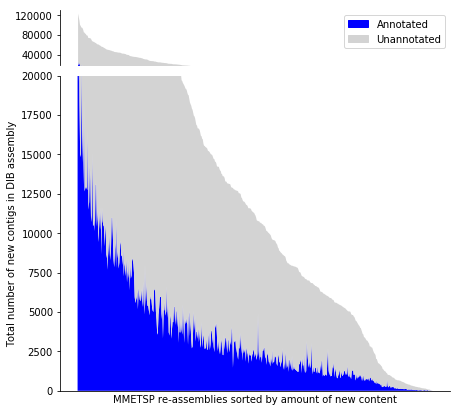

In [179]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

pl.figure(figsize=(7, 7))

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

gs = gridspec.GridSpec(6, 6)
ax = plt.subplot(gs[0,:])
ax2 = plt.subplot(gs[1:,:])

crbb_df.sort_values(by='false_crbb_num_transcripts', 
                    ascending=False)[['total_annotated_w_false_crbb','difference']].plot(kind='area', 
                    color=[ 'blue','lightgrey'], lw=0, ax=ax)
red_patch = mpatches.Patch(color='blue', label='Annotated')
blue_patch = mpatches.Patch(color='lightgrey',label='Unannotated')
ax.legend(handles=[red_patch,blue_patch])

# alternative legend labels:
# transcripts absent from NCGR
# annotated absent transcripts
crbb_df.sort_values(by='false_crbb_num_transcripts', 
                    ascending=False)[['total_annotated_w_false_crbb','difference']].plot(kind='area', 
                    color=[ 'blue','lightgrey'], lw=0, ax=ax2, legend=False)
ax.set_ylim([20000,130000])
ax2.set_ylim([0,20000])
simpleaxis(ax)
simpleaxis(ax2)
ax.spines['bottom'].set_visible(False)
ax2.set_xticks([])
ax.set_xticks([])
ax.set_yticks(np.arange(40000,120001,40000))
ax2.set_xlabel("MMETSP re-assemblies sorted by amount of new content")
ax2.set_ylabel("Total number of new contigs in DIB assembly")
savefig('../paper/false_crbb.png')
savefig('../paper/false_crbb.pdf')

# What happened to low DIB BUSCO?

In [158]:
# Where difference is more than 60% between NCGR and DIB
df1=ncgr_busco_v3_euk
df2=dib_busco_v3_euk
df2=dib_busco_v3_euk
column='Complete_BUSCO_perc'
df1name = 'df1'
df2name = 'df2'
df1.columns = ['SampleName', 'Complete_BUSCO_perc_NCGR']
df2.columns = ['SampleName', 'Complete_BUSCO_perc_DIB']
combined_df = pd.merge(df1, df2,on='SampleName')
print(combined_df.shape)
print('NCGR:',len(combined_df.loc[combined_df['Complete_BUSCO_perc_NCGR'] > combined_df['Complete_BUSCO_perc_DIB']]))
print('DIB:',len(combined_df.loc[combined_df['Complete_BUSCO_perc_NCGR'] <= combined_df['Complete_BUSCO_perc_DIB']]))
diff = combined_df.loc[(combined_df['Complete_BUSCO_perc_NCGR'] - combined_df['Complete_BUSCO_perc_DIB']) > 30]
print(diff)

(676, 3)
NCGR: 392
DIB: 284
     SampleName  Complete_BUSCO_perc_NCGR  Complete_BUSCO_perc_DIB
18   MMETSP0121                 65.016502                31.683168
134  MMETSP0932                 85.148515                 3.630363
232  MMETSP0045                 73.927393                35.313531
282  MMETSP0169                 68.646865                 6.270627
451  MMETSP0232                 82.508251                 0.660066
475  MMETSP0439                 80.858086                 3.630363
654  MMETSP0329                 80.198020                 5.280528
661  MMETSP0717                 61.716172                17.821782


# What happened to low DIB ORF?

In [160]:
# Where difference is more than 60% between NCGR and DIB
df1=ncgr_transrate_nt
df2=dib_transrate_nt
column='mean_orf_percent'
df1name = 'mean_orf_percent_NCGR'
df2name = 'mean_orf_percent_DIB'
combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
print(combined_df.head())
newdf=pd.DataFrame(index=combined_df.index)
newdf[df1name]=combined_df[column+'_x']
newdf[df2name]=combined_df[column+'_y']
print(newdf.head())
diff = newdf.loc[(newdf[df1name] - newdf[df2name]) > 10]
print(diff)
diff = combined_df.loc[(combined_df['mean_orf_percent_NCGR'] - combined_df['mean_orf_percent_DIB']) > 10]

  SampleName_x  p_refs_with_CRBB_x  n_seqs_x  mean_orf_percent_x SampleName_y  \
0   MMETSP0004             0.45255   24327.0            72.04233   MMETSP0004   
1   MMETSP0005             0.47173   25033.0            72.09239   MMETSP0005   
2   MMETSP0006             0.45844   30986.0            73.27725   MMETSP0006   
3   MMETSP0007             0.59737   21267.0            66.31098   MMETSP0007   
6   MMETSP0009             0.45785   30594.0            74.44895   MMETSP0009   

   p_refs_with_CRBB_y  n_seqs_y  mean_orf_percent_y  
0             0.66202   33559.0            81.26381  
1             0.65470   32824.0            80.15649  
2             0.72184   47463.0            80.79508  
3             0.86524   30922.0            71.01950  
6             0.79764   54275.0            80.37076  
   mean_orf_percent_NCGR  mean_orf_percent_DIB
0               72.04233              81.26381
1               72.09239              80.15649
2               73.27725              80.79508
3

KeyError: 'mean_orf_percent_NCGR'

# What happened to low DIB contigs?

In [164]:
df1=ncgr_transrate_nt
df2=dib_transrate_nt
column='n_seqs'
df1name = 'df1'
df2name = 'df2'
combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
newdf=pd.DataFrame(index=combined_df.index)
newdf[df1name]=combined_df[column+'_x']
newdf[df2name]=combined_df[column+'_y']
diff = newdf.loc[(newdf[df1name] - newdf[df2name]) > 10000]
#print('NCGR:',len(newdf.loc[newdf[df1name] > newdf[df2name]]))
#print('DIB:',len(newdf.loc[newdf[df1name] <= newdf[df2name]]))
print(diff)

         df1      df2
29   28655.0  17857.0
83   80158.0  53496.0
159  90223.0  68103.0
190  23362.0   1213.0


# What happened to low DIB Transrate scores?